# Задание 1 

Сгенерируйте матрицу В размером 3х3 со случайными элементами, равномерно распределенными на интервале от 0 до 1 и найдите её определитель.

In [1]:
import numpy as np

a = np.random.rand(3, 3)
print(a)
np.linalg.det(a)

[[0.21658864 0.00337998 0.26893708]
 [0.20527291 0.78909974 0.47952166]
 [0.50799744 0.6125748  0.68132309]]


-0.020814579143136842

# Задание 2

Для двух векторов:
С=$\left( \begin{matrix}
   1  \\
   2.94  \\
   -2.2  \\
   0.1   \\   
\end{matrix} \right)$ и b= {0.6; 3.2; -1.8, 0.05} найти меру косинусного сходства.

In [2]:
c = np.array([1, 2.94, -2.2, 0.1]).T
b = np.array([0.6, 3.2, -1.8, 0.05])

tmp = (c @ b) / (np.linalg.norm(b) * np.linalg.norm(c))
tmp

0.9864935664827553

# Задание 3 

Для заданного ниже объекта s проделайте следующее:

Создайте новый Series, значения которого совпадают со значениями s, а индексы - целочисленные значения от 4 до 15, не включая 15.
Выберите из s только целочисленные элементы и вычислите их дисперсию. (*)

Пояснения:
Дисперсия рассчитывается с помощью функции из библиотеки numpy: np.var( , ddof=0) или встроенной в python функции: .var(ddof=1)

In [3]:
import pandas as pd
s = pd.Series(data=['1', 5, 3.1, 'hello', -5, -1000, 12.78, 'world', 10.10, '!', 98], 
              index=range(6, 28, 2))

new_s = pd.Series(data=s.values,
                 index=range(4, 15))

print(new_s)

mass = []
for el in new_s:
    if type(el) is int:
        mass.append(el)
         
np.var(mass, ddof=0)



4         1
5         5
6       3.1
7     hello
8        -5
9     -1000
10    12.78
11    world
12     10.1
13        !
14       98
dtype: object


201563.25

### Информация для последующих заданий
- Для всех последующих заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные tr_mcc_codes, tr_types, transactions и gender_train из одноимённых таблиц из папки data. Для таблицы transactions используйте только первые n=1000000 строк. Обратите внимание на разделители внутри каждого из файлов - они могут различаться!

### Описание данных
#### Таблица transactions.csv

Таблица содержит историю транзакций клиентов банка за один год и три месяца.

#### Формат данных

customer_id,tr_datetime,mcc_code,tr_type,amount,term_id

111111,15 01:40:52,1111,1000,-5224,111111

111112,15 15:18:32,3333,2000,-100,11122233

...

#### Описание полей
customer_id — идентификатор клиента;

tr_datetime — день и время совершения транзакции (дни нумеруются с начала данных);

mcc_code — mcc-код транзакции;

tr_type — тип транзакции;

amount — сумма транзакции в условных единицах со знаком; + — начисление средств клиенту (приходная транзакция), - — списание средств (расходная транзакция);

term_id — идентификатор терминала;

### Таблица gender_train.csv

Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

#### Формат данных
customer_id,gender

111111,0

111112,1

...

#### Описание полей
customer_id — идентификатор клиента;

gender — пол клиента;

### Таблица tr_mcc_codes.csv

Данная таблица содержит описание mcc-кодов транзакций.

#### Формат данных
mcc_code;mcc_description

1000;словесное описание mcc-кода 1000

2000;словесное описание mcc-кода 2000

...

#### Описание полей
mcc_code – mcc-код транзакции;

mcc_description — описание mcc-кода транзакции.

### Таблица tr_types.csv

Данная таблица содержит описание типов транзакций.

#### Формат данных
tr_type;tr_description

1000;словесное описание типа транзакции 1000

2000;словесное описание типа транзакции 2000

...

#### Описание полей
tr_type – тип транзакции;

tr_description — описание типа транзакции;

# Задание 4

1. В датафрейме transactions задайте столбец  customer_id в качестве индекса.
2. Выделите клиента с максимальной суммой транзакции (то есть с максимальным приходом на карту). (\*)
3. Найдите у него наиболее часто встречающийся модуль суммы приходов/расходов. (\**)
4. Выделите клиента с минимальной суммой транзакции.



##### Пояснения:
(\*) Если у клиента были транзакции [-10000, 10, 0, -10], то максимумом будет являться значение 10. <br>
(\**) Если у клиента были транзакции [-10000, 10, 0, -10], то наиболее встречающийся модуль суммы транзакций равен 10, и встретился он 2 раза.

In [4]:
df = pd.read_csv("transactions.csv", sep=',', nrows=1000000, index_col='customer_id')

tmp = df.loc[df['amount'].idxmax()].copy()
print(tmp)
tmp['amount'] = tmp['amount'].map(lambda x: abs(x))

print(tmp['amount'].value_counts().head(1))

ans = tmp.loc[tmp['amount'].idxmin()].copy()
print(ans)

              tr_datetime  mcc_code  tr_type     amount   term_id
customer_id                                                      
26782922       4 00:00:00      4812     1100  -31442.82       NaN
26782922       5 00:00:00      6300     1100  -11935.25       NaN
26782922       7 00:00:00      9399     1100  -11229.58       NaN
26782922       7 00:00:00      4814     1100  -67377.47       NaN
26782922       8 00:00:00      4900     1100 -129913.87       NaN
...                   ...       ...      ...        ...       ...
26782922     452 21:47:21      6010     7070  988202.94    888919
26782922     453 00:00:00      5995     1110  -80852.97  T0060960
26782922     454 21:45:02      4814     1030  -22459.16    888906
26782922     456 00:00:00      5411     1110  -10488.43  50127546
26782922     456 08:29:15      6010     7070  116787.62    888911

[294 rows x 5 columns]
amount
22459.16    25
Name: count, dtype: int64
              tr_datetime  mcc_code  tr_type     amount   term_id
cust

# Задание 5

Соедините transactions со всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [5]:
df = pd.read_csv("transactions.csv", sep=',', nrows=1000000)
codes = pd.read_csv('tr_mcc_codes.csv', sep=';')
types = pd.read_csv('tr_types.csv', sep=';')
gender = pd.read_csv('gender_train.csv', sep=',')

new_df = pd.merge(df, gender, how='left')
data = pd.merge(new_df, codes)
data = pd.merge(data, types)
print(data)

        customer_id   tr_datetime  mcc_code  tr_type      amount term_id  \
0          39026145    0 10:23:26      4814     1030    -2245.92     NaN   
1          39026145    6 07:08:31      4814     1030    -5614.79     NaN   
2          39026145    8 07:06:10      4814     1030    -1122.96     NaN   
3          39026145   11 08:49:03      4814     1030    -2245.92     NaN   
4          39026145   11 14:12:08      4814     1030    -2245.92     NaN   
...             ...           ...       ...      ...         ...     ...   
999579     36837532   18 23:38:60      3000     6000  1297824.89     NaN   
999580      6808459  206 19:00:10      3000     6000   124693.24     NaN   
999581     83759123   90 22:40:57      3000     6000   218976.79     NaN   
999582     89619970  104 23:39:35      3000     6000   408307.49     NaN   
999583     89619970  105 23:38:49      3000     6000   204153.74     NaN   

        gender                                    mcc_description  \
0          1.0  Зв

# Задание 6

1. Определите модуль разницы между медианными тратами женщин и мужчин (трата - отрицательное значение amount). 



##### Пояснения:


(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

In [6]:
amn = data.loc[data['amount'] < 0].copy()
t1 = amn[amn['gender'] == 0.0]['amount'].median()
t2 = amn[amn['gender'] == 1.0]['amount'].median()
print(t2 - t1)

-1459.8500000000004


# Задание 7

1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можно использовать строковые методы для датафрейма - .str.split(), например. 
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.<br>
Снять ограничение на количество выводимых строк можно с помощью:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(a)

In [30]:
import numpy as np
import pandas as pd

data['tr_day'] = data['tr_datetime'].apply(lambda x: x.split()[0])
# print('\nAnswer1', data)
data_c = data.groupby(['tr_day'])
tmp = data_c.filter(lambda x: x['mcc_code'].nunique() > 75)
# print('\nAnswer2', tmp)
ans3 = tmp.groupby(['gender', 'mcc_code'])
# print('\nAnswer3', ans3)
for item in ans3:
    print(item[0][0], '-', item[1]['mcc_description'], item[1]['amount'])



0.0 - 271711    Ветеринарные услуги
271712    Ветеринарные услуги
271714    Ветеринарные услуги
271715    Ветеринарные услуги
271717    Ветеринарные услуги
271718    Ветеринарные услуги
271720    Ветеринарные услуги
271728    Ветеринарные услуги
271729    Ветеринарные услуги
271730    Ветеринарные услуги
Name: mcc_description, dtype: object 271711    -23986.38
271712    -33598.90
271714    -10780.40
271715   -115664.66
271717     -7186.93
271718    -16507.48
271720    -60639.73
271728    -19090.28
271729    -20213.24
271730     -8354.81
Name: amount, dtype: float64
0.0 - 270818    Генеральные подрядчики по вентиляции, теплосна...
Name: mcc_description, dtype: object 270818   -674897.69
Name: amount, dtype: float64
0.0 - 271567    Подрядчики, специализированная торговля — нигд...
271582    Подрядчики, специализированная торговля — нигд...
271591    Подрядчики, специализированная торговля — нигд...
Name: mcc_description, dtype: object 271567      -673.77
271582    -45704.39
271591   -198

# Задание 8

1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в созданную функцию plot_pivot_table.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
     1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
     2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
     3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
     4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
     5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [ ]:
### Type your code here

## Задание 9
Считайте данные из файла 'winemag-data-130k-v2.csv'. 
а) Постройте точечный график (Scatter plot), по оси х отложите points, а по y - price.
б) Постройте график Barplot количества вин по странам.

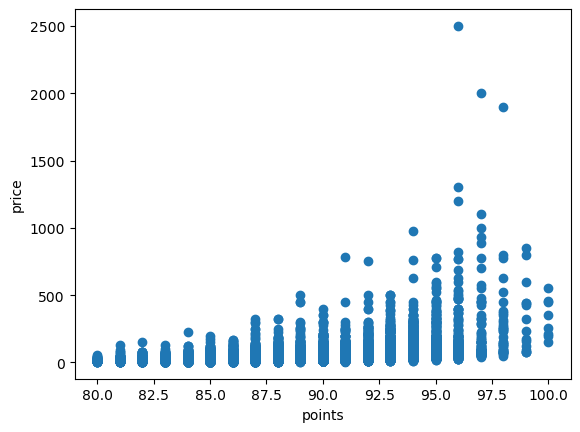

         country                  winery
0          Italy                 Nicosia
1       Portugal     Quinta dos Avidagos
2             US               Rainstorm
3             US              St. Julian
4             US            Sweet Cheeks
...          ...                     ...
65494     France           William Fèvre
65495  Australia                Tapestry
65496         US                   Fritz
65497         US                  Hendry
65498      Spain  Bodegas Dios Baco S.L.

[65499 rows x 2 columns]


In [37]:
import matplotlib.pyplot as plt


wine = pd.read_csv('winemag-data-130k-v2.csv', sep=',')
plt.scatter(wine['points'], wine['price'])
plt.xlabel('points')
plt.ylabel('price')
plt.show()

print(wine[['country', 'winery']])

In [39]:
import seaborn as sb
wine = pd.read_csv('winemag-data-130k-v2.csv', sep=',')
wine[''] = wine.value_counts
sb.barplot(x='winery', y='country', data=wine)

TypeError: Neither the `x` nor `y` variable appears to be numeric.